In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals.csv')

In [3]:
df['Month_Beginning'] = pd.to_datetime(df['Month_Beginning'])

In [4]:
df.set_index('Month_Beginning',inplace=True)
df.sort_index(inplace=True)

In [5]:
df.head()

,route,routename,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal
Month_Beginning,,,,,,
2001-01-01,1,Indiana/Hyde Park,6982.6,0.0,0.0,153617
2001-01-01,97,Skokie,3681.4,2066.7,1167.5,95096
2001-01-01,96,Lunt,1343.2,0.0,0.0,29550
2001-01-01,95W,West 95th,5162.6,4526.5,2556.7,144468
2001-01-01,95E,93rd-95th,5787.1,4530.5,3014.3,160511


In [6]:
df['route'].nunique()

184

In [7]:
plt.figure(figsize=(15,8))
df_total = df.groupby('Month_Beginning').sum()[['MonthTotal']].copy()
#df_total.sort_index(inplace=True)

<Figure size 1080x576 with 0 Axes>

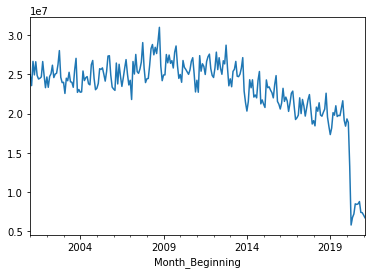

In [13]:
df_total.sort_index(inplace=True)
df_total['MonthTotal'].plot();

In [11]:
df_1 = df[df['route']=='1'].copy()

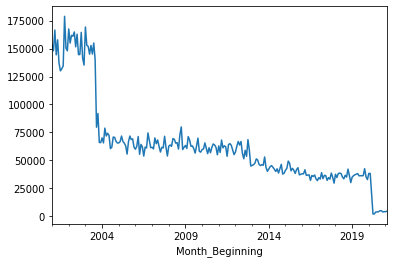

In [15]:
df_1['MonthTotal'].plot();

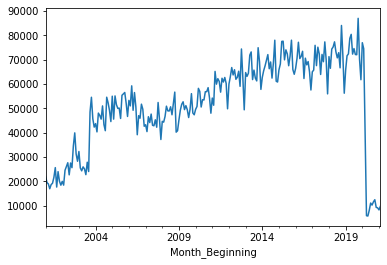

In [17]:
df_2 = df[df['route']=='2'].copy()
df_2['MonthTotal'].plot();

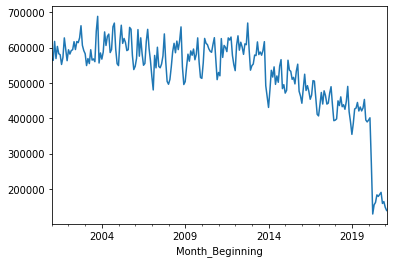

In [18]:
df_3 = df[df['route']=='3'].copy()
df_3['MonthTotal'].plot();